In [1]:
'''
Handwritten Digit Recognition
Using MNIST as dataset

Part 1 Describe the dataset of digits
Part 2 Read the snapshot50.pkl file
Part 3 Train the standard feedforward neural network using gradient descent (without momentum)
Part 4 Train the standard feedforward neural network using gradient descent (with momentum)
Part 5 Plot the trajectory for the standard neural network using gradient descent (without momentum)
Part 6 Plot the trajectory for the standard neural network using gradient descent (with momentum)
Part 7 Use CNN instead of the standard neural network
Part 8 Overfit Optimization: Using Regularization, Increasing width and Going deeper
Part 9 Calculate optimized CNN's accuracy

'''

"\nHandwritten Digit Recognition\nUsing MNIST as dataset\n\nPart 1 Describe the dataset of digits\nPart 2 Read the snapshot50.pkl file\nPart 3 Train the standard feedforward neural network using gradient descent (without momentum)\nPart 4 Train the standard feedforward neural network using gradient descent (with momentum)\nPart 5 Plot the trajectory for the standard neural network using gradient descent (without momentum)\nPart 6 Plot the trajectory for the standard neural network using gradient descent (with momentum)\nPart 7 Use CNN instead of the standard neural network\nPart 8 Overfit Optimization: Using Regularization, Increasing width and Going deeper\nPart 9 Calculate optimized CNN's accuracy\n\n"

In [2]:
# Prevent the kernel from shutting down
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
# Part 1 Describe the dataset of digits

In [4]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

# Load the MNIST dataset
mnist_data = scipy.io.loadmat('C:/Users/HP/Desktop/MNIST/mnist_all.mat')

# Display the structure of the dataset
mnist_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

In [5]:
# The MNIST dataset consists of training and test sets for digits 0 through 9.

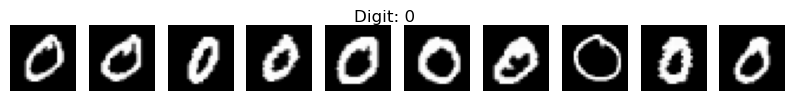

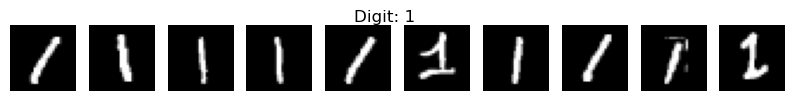

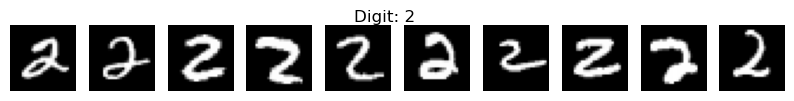

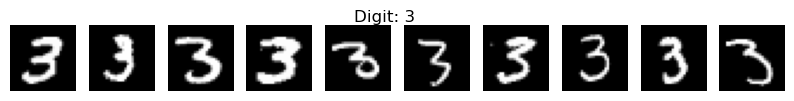

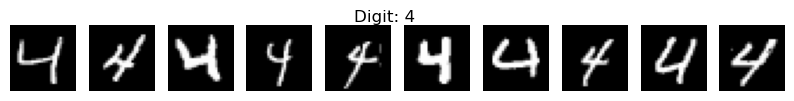

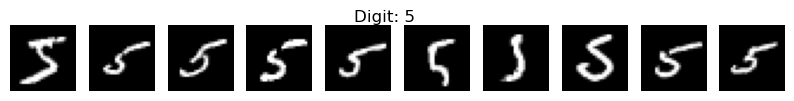

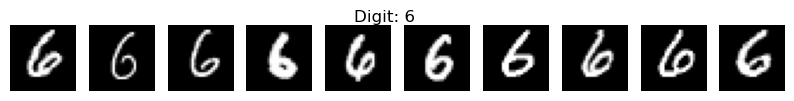

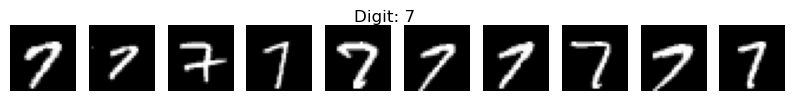

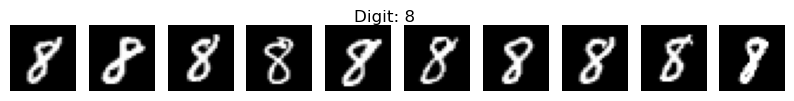

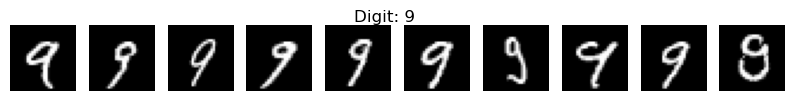

In [6]:
# Function to display images for each digit
def display_digit_images(digit_data, digit, num_examples=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(digit_data[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Digit: {digit}")
    plt.show()

# Display 10 images for each digit
for digit in range(10):
    digit_key = f'train{digit}'
    digit_data = mnist_data[digit_key]
    display_digit_images(digit_data, digit)

In [7]:
# Part 2 Read the snapshot50.pkl file

In [8]:
import pickle

# Load the snapshot50.pkl file
with open('C:/Users/HP/Desktop/MNIST/snapshot50.pkl', 'rb') as file:
    snapshot_data = pickle.load(file, encoding="latin1")

# Display the keys and structure of the snapshot data
snapshot_data.keys(), {key: type(snapshot_data[key]) for key in snapshot_data}

(dict_keys(['b0', 'b1', 'W1', 'W0']),
 {'b0': numpy.ndarray,
  'b1': numpy.ndarray,
  'W1': numpy.ndarray,
  'W0': numpy.ndarray})

In [9]:
'''
The snapshot50.pkl file contains four components:

W0: Weights for the input layer.
b0: Biases for the input layer.
W1: Weights for the hidden layer.
b1: Biases for the hidden layer.

'''

'\nThe snapshot50.pkl file contains four components:\n\nW0: Weights for the input layer.\nb0: Biases for the input layer.\nW1: Weights for the hidden layer.\nb1: Biases for the hidden layer.\n\n'

In [10]:
# Part 3 Train the standard feedforward neural network using gradient descent (without momentum)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle

# Load the snapshot50.pkl file and extract weights and biases
with open('C:/Users/HP/Desktop/MNIST/snapshot50.pkl', 'rb') as file:
    snapshot_data = pickle.load(file, encoding="latin1")

W0, b0, W1, b1 = snapshot_data['W0'], snapshot_data['b0'], snapshot_data['W1'], snapshot_data['b1']

In [12]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Combine training data and labels
all_train_data = []
all_train_labels = []
for digit in range(10):
    digit_data = mnist_data[f'train{digit}'] / 255.0  # Normalize the data
    digit_labels = np.full(digit_data.shape[0], digit)  # Create labels for this digit
    all_train_data.append(digit_data)
    all_train_labels.append(digit_labels)

all_train_data = np.concatenate(all_train_data, axis=0)
all_train_labels = np.concatenate(all_train_labels, axis=0)

# Split the dataset into training, validation, and test sets (70%, 15%, 15%)
train_data, test_data, train_labels, test_labels = train_test_split(
    all_train_data, all_train_labels, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(
    test_data, test_labels, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
train_data, train_labels = torch.Tensor(train_data), torch.Tensor(train_labels).long()
val_data, val_labels = torch.Tensor(val_data), torch.Tensor(val_labels).long()
test_data, test_labels = torch.Tensor(test_data), torch.Tensor(test_labels).long()

# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(TensorDataset(train_data, train_labels), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=64, shuffle=True)




Epoch [1/10], Loss: 0.8168
Epoch [2/10], Loss: 0.4427
Epoch [3/10], Loss: 0.3792
Epoch [4/10], Loss: 0.3457
Epoch [5/10], Loss: 0.3239
Epoch [6/10], Loss: 0.3072
Epoch [7/10], Loss: 0.2937
Epoch [8/10], Loss: 0.2828
Epoch [9/10], Loss: 0.2729
Epoch [10/10], Loss: 0.2642


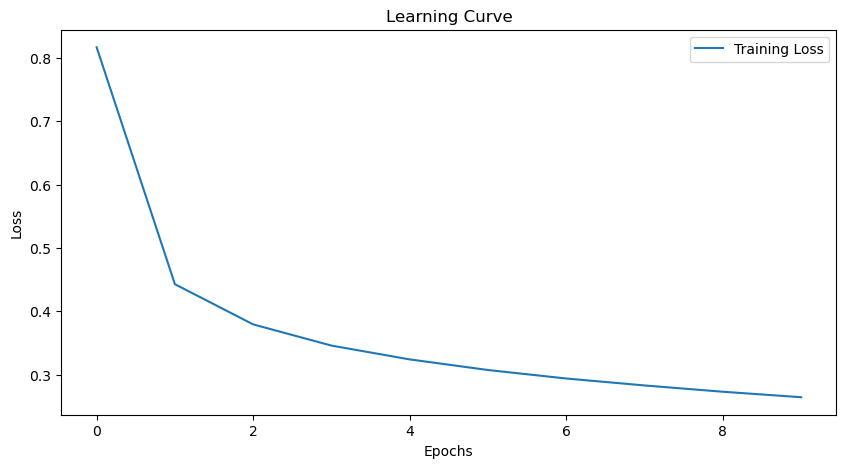

In [13]:
# Define the SimpleNeuralNetwork class
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        x = torch.tanh(self.fc1(x))  # Tanh activation for hidden layer
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Log-softmax for output layer

# Initialize the neural network
input_size = 784  # Corrected number of input features (28*28 for MNIST images)
hidden_size = W0.shape[0]  # Size of hidden layer
num_classes = 10  # Number of output classes (digits 0-9)
net = SimpleNeuralNetwork(input_size, hidden_size, num_classes)

# Loading the weights and biases from the snapshot into the PyTorch model
net.fc1.weight.data = torch.from_numpy(W0.T).float()  # Transposed W0
net.fc1.bias.data = torch.from_numpy(b0).float()
net.fc2.weight.data = torch.from_numpy(W1.T).float()  # Transposed W1
net.fc2.bias.data = torch.from_numpy(b1).float()

# Initialize weights and biases with a normal distribution
torch.nn.init.normal_(net.fc1.weight, mean=0.0, std=0.1)
torch.nn.init.normal_(net.fc2.weight, mean=0.0, std=0.1)
net.fc1.bias.data.zero_()
net.fc2.bias.data.zero_()

# Set the learning rate and define the loss function and optimizer
learning_rate = 0.01
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

# Training loop
num_epochs = 10
loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)  # Flatten the images
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')
    loss_values.append(running_loss/len(train_loader))


# Plotting the learning curve
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), loss_values, label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Part 4  Train the standard feedforward neural network using gradient descent (with momentum)

Epoch [1/10], Loss: 0.2448
Epoch [2/10], Loss: 0.1976
Epoch [3/10], Loss: 0.1661
Epoch [4/10], Loss: 0.1414
Epoch [5/10], Loss: 0.1237
Epoch [6/10], Loss: 0.1091
Epoch [7/10], Loss: 0.0974
Epoch [8/10], Loss: 0.0868
Epoch [9/10], Loss: 0.0781
Epoch [10/10], Loss: 0.0712


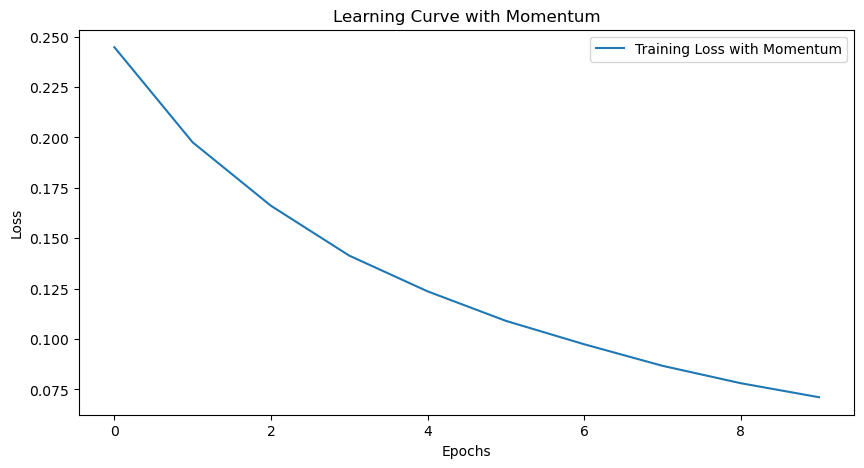

In [15]:
# Updated optimizer with momentum
momentum_value = 0.9
optimizer_momentum = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum_value)

# Training loop with momentum
num_epochs_momentum = 10
loss_values_momentum = []

for epoch in range(num_epochs_momentum):
    running_loss_momentum = 0.0
    for inputs, targets in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)  # Flatten the images
        optimizer_momentum.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer_momentum.step()
        running_loss_momentum += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs_momentum}], Loss: {running_loss_momentum/len(train_loader):.4f}')
    loss_values_momentum.append(running_loss_momentum/len(train_loader))

# Plotting the learning curve with momentum
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs_momentum), loss_values_momentum, label='Training Loss with Momentum')
plt.title('Learning Curve with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Part 5 Plot the trajectory for the standard neural network using gradient descent (without momentum)

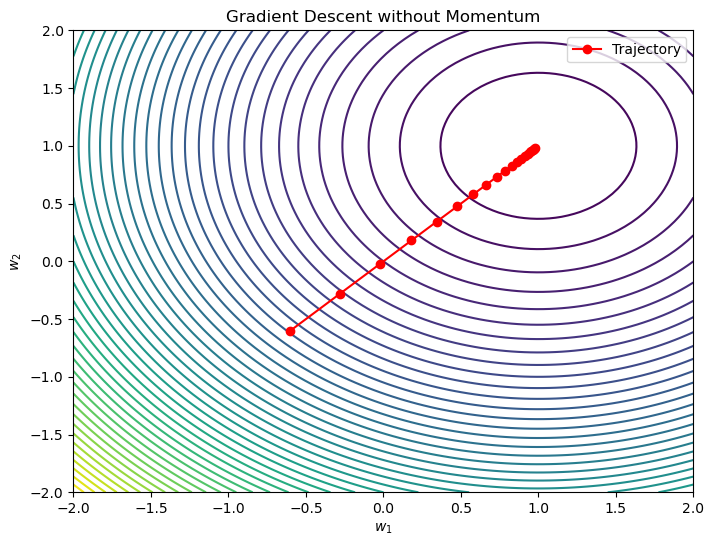

In [17]:
def cost_function(w1, w2):
    return (w1 - 1)**2 + (w2 - 1)**2

def gradient(w1, w2):
    return 2 * (w1 - 1), 2 * (w2 - 1)

# Re-initialize w1 and w2 to a value away from the local optimum
w1, w2 = -1.0, -1.0

# Parameters for vanilla gradient descent
learning_rate = 0.1
K = 20  # Number of steps

# Trajectory of w1 and w2
trajectory = np.zeros((K, 2))

# Vanilla gradient descent without momentum
for i in range(K):
    dw1, dw2 = gradient(w1, w2)
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    trajectory[i] = [w1, w2]

# Plotting the trajectory on the cost function contour
w1_range = np.linspace(-2, 2, 100)
w2_range = np.linspace(-2, 2, 100)
w1_grid, w2_grid = np.meshgrid(w1_range, w2_range)
cost_grid = cost_function(w1_grid, w2_grid)

plt.figure(figsize=(8, 6))
plt.contour(w1_grid, w2_grid, cost_grid, levels=50)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajectory')
plt.title('Gradient Descent without Momentum')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.legend()
plt.show()

In [18]:
'''
The plot above illustrates the trajectory of the weights w1 and w2 
over 20 steps of vanilla gradient descent (without momentum) on a hypothetical cost function. 
Starting from the initial values of -1.0 for both w1 and w2, 
the weights are updated towards the local optimum.

'''

'\nThe plot above illustrates the trajectory of the weights w1 and w2 \nover 20 steps of vanilla gradient descent (without momentum) on a hypothetical cost function. \nStarting from the initial values of -1.0 for both w1 and w2, \nthe weights are updated towards the local optimum.\n\n'

In [19]:
# Part 6 Plot the trajectory for the standard neural network using gradient descent (with momentum)

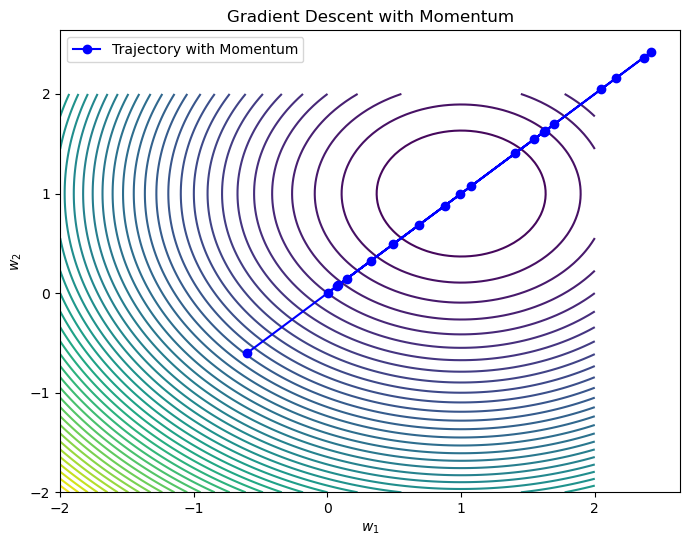

In [20]:
# Resetting w1 and w2 to the same initial values as in part (b)
w1, w2 = -1.0, -1.0

# Parameters for gradient descent with momentum
momentum = 0.9
velocity_w1, velocity_w2 = 0, 0  # Initial velocities

# Trajectory of w1 and w2 with momentum
trajectory_momentum = np.zeros((K, 2))

# Gradient descent with momentum
for i in range(K):
    dw1, dw2 = gradient(w1, w2)
    velocity_w1 = momentum * velocity_w1 + learning_rate * dw1
    velocity_w2 = momentum * velocity_w2 + learning_rate * dw2
    w1 -= velocity_w1
    w2 -= velocity_w2
    trajectory_momentum[i] = [w1, w2]

# Plotting the trajectory on the cost function contour with momentum
plt.figure(figsize=(8, 6))
plt.contour(w1_grid, w2_grid, cost_grid, levels=50)
plt.plot(trajectory_momentum[:, 0], trajectory_momentum[:, 1], 'bo-', label='Trajectory with Momentum')
plt.title('Gradient Descent with Momentum')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.legend()
plt.show()

In [21]:
'''
The most noticeable difference is in the paths taken by the two methods. 
Without momentum, the path is more straightforward, while with momentum, the path has a swinging motion. 
This difference is caused by the momentum term, which accumulates gradients over time. 
It helps in propelling the updates through regions of shallow gradient, but it can also cause overshooting.
While both methods converge to the minimum, the momentum-based approach initially overshoots due to accumulated velocity. 
This is beneficial in more complex landscapes with many local minima or saddle points, as it can prevent the optimizer from getting stuck.

'''

'\nThe most noticeable difference is in the paths taken by the two methods. \nWithout momentum, the path is more straightforward, while with momentum, the path has a swinging motion. \nThis difference is caused by the momentum term, which accumulates gradients over time. \nIt helps in propelling the updates through regions of shallow gradient, but it can also cause overshooting.\nWhile both methods converge to the minimum, the momentum-based approach initially overshoots due to accumulated velocity. \nThis is beneficial in more complex landscapes with many local minima or saddle points, as it can prevent the optimizer from getting stuck.\n\n'

In [22]:
# Part 7 Use CNN instead of the standard neural network

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # First convolutional layer (input channel size = 1 for grayscale images)
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Assuming input images are 28x28
        self.fc2 = nn.Linear(128, 10)  # 10 output classes (digits 0-9)

    def forward(self, x):
        # Apply first convolutional layer, then pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolutional layer, then pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for the fully connected layer
        x = x.view(-1, 64 * 7 * 7)
        # Apply first fully connected layer with ReLU
        x = F.relu(self.fc1(x))
        # Apply second fully connected layer (output layer)
        x = self.fc2(x)
        return x

# Instantiate the CNN
cnn = SimpleCNN()
cnn

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [24]:
# Adjust the data loaders to reshape the data for CNN input
# Reshape data to (batch_size, channels, height, width)
# MNIST images are 28x28, so we reshape to (batch_size, 1, 28, 28)

train_data = train_data.view(-1, 1, 28, 28)
val_data = val_data.view(-1, 1, 28, 28)
test_data = test_data.view(-1, 1, 28, 28)

# Recreate DataLoaders with the reshaped data
train_loader = DataLoader(TensorDataset(train_data, train_labels), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=64, shuffle=True)

# Confirm the shape of the data in the loaders
next(iter(train_loader))[0].shape, next(iter(val_loader))[0].shape, next(iter(test_loader))[0].shape

(torch.Size([64, 1, 28, 28]),
 torch.Size([64, 1, 28, 28]),
 torch.Size([64, 1, 28, 28]))

In [25]:
# Function to check if GPU is available and move model and data to GPU if so
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Check for GPU and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Change the loss function to Cross Entropy Loss Function
criterion = nn.CrossEntropyLoss()

# Update the train_model function to use GPU
def train_model_gpu(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=None):
    train_losses, val_losses = [], []
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0

        # Training loop
        for inputs, labels in train_loader:
            inputs, labels = to_device(inputs, device), to_device(labels, device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average training loss for the epoch
        epoch_train_loss = running_loss / len(train_loader)
        train_losses.append(epoch_train_loss)

        # Validation loop
        model.eval()  # Set model to evaluation mode
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = to_device(inputs, device), to_device(labels, device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        # Calculate average validation loss for the epoch
        epoch_val_loss = running_val_loss / len(val_loader)
        val_losses.append(epoch_val_loss)

        print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}')

    return train_losses, val_losses

# Update the CNN model to use GPU if available
cnn_gpu = SimpleCNN().to(device)

# Define optimizer for the GPU model
optimizer_gpu = optim.Adam(cnn_gpu.parameters(), lr=0.001)

# Training the model on GPU
train_losses_gpu, val_losses_gpu = train_model_gpu(cnn_gpu, train_loader, val_loader, criterion, optimizer_gpu, num_epochs=10, device=device)

Using device: cuda
Epoch 1/10 - Training Loss: 0.2213, Validation Loss: 0.0809
Epoch 2/10 - Training Loss: 0.0638, Validation Loss: 0.0522
Epoch 3/10 - Training Loss: 0.0448, Validation Loss: 0.0426
Epoch 4/10 - Training Loss: 0.0311, Validation Loss: 0.0362
Epoch 5/10 - Training Loss: 0.0255, Validation Loss: 0.0510
Epoch 6/10 - Training Loss: 0.0196, Validation Loss: 0.0361
Epoch 7/10 - Training Loss: 0.0163, Validation Loss: 0.0433
Epoch 8/10 - Training Loss: 0.0111, Validation Loss: 0.0498
Epoch 9/10 - Training Loss: 0.0101, Validation Loss: 0.0424
Epoch 10/10 - Training Loss: 0.0100, Validation Loss: 0.0495


In [26]:
'''
According to the training loss, it consistently decreases over epochs, 
indicating that the model is learning effectively from the training data.

According to the validation loss, Initially, it decreases, indicating that the model is generalizing well. 
However, from epoch 5 onwards, the validation loss starts to increase or fluctuate while the training loss continues to decrease. 
This is a classic sign of overfitting.

'''

'\nAccording to the training loss, it consistently decreases over epochs, \nindicating that the model is learning effectively from the training data.\n\nAccording to the validation loss, Initially, it decreases, indicating that the model is generalizing well. \nHowever, from epoch 5 onwards, the validation loss starts to increase or fluctuate while the training loss continues to decrease. \nThis is a classic sign of overfitting.\n\n'

In [27]:
# Part 8 Overfit Optimization: Using Regularization, Increasing width and Going deeper

In [28]:
# Define an updated CNN architecture with dropout for regularization
class SimpleCNNWithDropout(nn.Module):
    def __init__(self):
        super(SimpleCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer after convolutions
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer before final output layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

# Instantiate the updated CNN with dropout
cnn_with_dropout = SimpleCNNWithDropout().to(device)

# Re-define optimizer for the updated model
optimizer_with_dropout = optim.Adam(cnn_with_dropout.parameters(), lr=0.001)

train_losses_dropout, val_losses_dropout = train_model_gpu(cnn_with_dropout, train_loader, val_loader, criterion, optimizer_with_dropout, num_epochs=10, device=device)

Epoch 1/10 - Training Loss: 0.3881, Validation Loss: 0.0798
Epoch 2/10 - Training Loss: 0.1309, Validation Loss: 0.0526
Epoch 3/10 - Training Loss: 0.1001, Validation Loss: 0.0455
Epoch 4/10 - Training Loss: 0.0860, Validation Loss: 0.0479
Epoch 5/10 - Training Loss: 0.0732, Validation Loss: 0.0375
Epoch 6/10 - Training Loss: 0.0635, Validation Loss: 0.0387
Epoch 7/10 - Training Loss: 0.0618, Validation Loss: 0.0357
Epoch 8/10 - Training Loss: 0.0542, Validation Loss: 0.0416
Epoch 9/10 - Training Loss: 0.0514, Validation Loss: 0.0363
Epoch 10/10 - Training Loss: 0.0458, Validation Loss: 0.0330


In [29]:
'''
The model does not exhibit clear signs of overfitting. 
Both training and validation losses are decreasing, and the validation loss is not increasing or diverging from the training loss. 
This suggests that the model is generalizing well to unseen data.

'''

'\nThe model does not exhibit clear signs of overfitting. \nBoth training and validation losses are decreasing, and the validation loss is not increasing or diverging from the training loss. \nThis suggests that the model is generalizing well to unseen data.\n\n'

In [31]:
class WiderCNN(nn.Module):
    def __init__(self):
        super(WiderCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)  # Increased width
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Increased width
        self.fc1 = nn.Linear(128 * 7 * 7, 256)  # Increased width
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Instantiate the Wider CNN
wider_cnn = WiderCNN().to(device)

# Define optimizer for the Wider CNN model
optimizer_wider = optim.Adam(wider_cnn.parameters(), lr=0.001)

# Train the Wider CNN model
train_losses_wider, val_losses_wider = train_model_gpu(wider_cnn, train_loader, val_loader, criterion, optimizer_wider, num_epochs=10, device=device)

Epoch 1/10 - Training Loss: 0.1563, Validation Loss: 0.0548
Epoch 2/10 - Training Loss: 0.0425, Validation Loss: 0.0437
Epoch 3/10 - Training Loss: 0.0293, Validation Loss: 0.0447
Epoch 4/10 - Training Loss: 0.0202, Validation Loss: 0.0529
Epoch 5/10 - Training Loss: 0.0140, Validation Loss: 0.0459
Epoch 6/10 - Training Loss: 0.0132, Validation Loss: 0.0424
Epoch 7/10 - Training Loss: 0.0098, Validation Loss: 0.0488
Epoch 8/10 - Training Loss: 0.0062, Validation Loss: 0.0360
Epoch 9/10 - Training Loss: 0.0083, Validation Loss: 0.0468
Epoch 10/10 - Training Loss: 0.0073, Validation Loss: 0.0387


In [32]:
'''
The increasing trend in validation loss from epochs 6 to 9, 
despite the decreasing training loss, 
suggests the model might be overfitting.

'''

'\nThe increasing trend in validation loss from epochs 6 to 9, \ndespite the decreasing training loss, \nsuggests the model might be overfitting.\n\n'

In [34]:
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Additional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 3 * 3, 128)  # Adjusted for the added layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  # Additional layer
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Instantiate the Deeper CNN
deeper_cnn = DeeperCNN().to(device)

# Define optimizer for the Deeper CNN model
optimizer_deeper = optim.Adam(deeper_cnn.parameters(), lr=0.001)

# Train the Deeper CNN model
train_losses_deeper, val_losses_deeper = train_model_gpu(deeper_cnn, train_loader, val_loader, criterion, optimizer_deeper, num_epochs=10, device=device)

Epoch 1/10 - Training Loss: 0.2355, Validation Loss: 0.0683
Epoch 2/10 - Training Loss: 0.0590, Validation Loss: 0.0658
Epoch 3/10 - Training Loss: 0.0378, Validation Loss: 0.0385
Epoch 4/10 - Training Loss: 0.0297, Validation Loss: 0.0478
Epoch 5/10 - Training Loss: 0.0240, Validation Loss: 0.0443
Epoch 6/10 - Training Loss: 0.0192, Validation Loss: 0.0446
Epoch 7/10 - Training Loss: 0.0140, Validation Loss: 0.0434
Epoch 8/10 - Training Loss: 0.0146, Validation Loss: 0.0438
Epoch 9/10 - Training Loss: 0.0098, Validation Loss: 0.0408
Epoch 10/10 - Training Loss: 0.0101, Validation Loss: 0.0413


In [ ]:
'''
There are signs of potential overfitting, as indicated by the fluctuations in the validation loss, 
especially in epochs 6, 9, and 10. 
However, these signs are less pronounced compared to the wider model.

'''

In [ ]:
'''
Based on these results, using dropout appears to be the most effective way to optimize this CNN model. 
It helps in preventing overfitting while maintaining good performance on both training and validation sets. 
The dropout model strikes the best balance between model complexity and the ability to generalize, 
making it the preferable choice among the three tested approaches.

It's important to note that the optimal model may vary depending on the specific characteristics of the dataset and the task. 
However, in this case, the dropout model demonstrates the best performance.

'''

In [ ]:
# Part 9 Calculate optimized CNN's accuracy

In [35]:
def calculate_accuracy(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = to_device(inputs, device), to_device(labels, device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Calculate accuracy on the test dataset
test_accuracy = calculate_accuracy(cnn_with_dropout, test_loader, device)
print(f"Test Accuracy: {test_accuracy}%")

Test Accuracy: 98.92222222222222%


In [36]:
val_accuracy = calculate_accuracy(cnn_with_dropout, val_loader, device)
print(f"Validation Accuracy: {val_accuracy}%")

Validation Accuracy: 99.06666666666666%
